In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import dateutil
import numpy as np
from scipy.interpolate import interp1d

In [2]:
FOLDER_PATH = os.path.join("Z:", "Data", "20210816_RTStageTesting_MW_MembraneSample", "ZVL_continuous_testing")

In [3]:
FOLDER_PATH2 = os.path.join("Z:", "Data", "20190802_MW_Transmission")

11.881974649999997


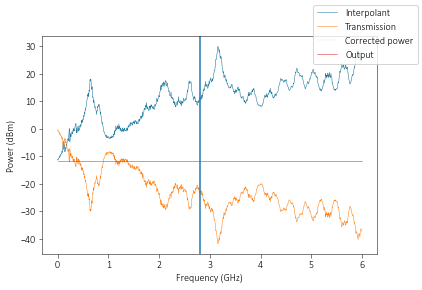

In [27]:
fig, ax = plt.subplots()

ax.set_ylabel("Power (dBm)")
ax.set_xlabel("Frequency (GHz)")

for file1, file2 in zip(os.listdir(FOLDER_PATH), os.listdir(FOLDER_PATH2)):
    if file1.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH, file1))
        
        print(np.max(-df["Power"]) - 30)
        power_correction = -df["Power"] - (np.max(-df["Power"]) - 30)
        
        f = interp1d(df["Frequency"], power_correction)
        
        ax.plot(df["Frequency"] / 1e9, f(df["Frequency"]), linewidth=0.5, label="Interpolant")
        ax.plot(df["Frequency"] / 1e9, df["Power"], linewidth=0.5, label="Transmission")
        ax.plot(df["Frequency"] / 1e9, power_correction, "--", linewidth=0.1, label="Corrected power")
        ax.plot(df["Frequency"] / 1e9, df["Power"]+power_correction, linewidth=0.5, label="Output")
        break

    if file2.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH2, file2), skiprows=2)
        #ax.plot(df["freq[Hz]"] / 1e9, df["Trc1_S21[dB]"], linewidth=0.5, label=f"{file2}")
        
zfs = 2.8
mw_r = 2.8 * 0.4
ax.axvline(zfs)
#ax.set_xlim([zfs - mw_r, zfs + mw_r])
fig.legend()

In [28]:
df["Power"] = -df["Power"] - (np.max(-df["Power"]) - 30)

In [29]:
df.to_csv(os.path.join(FOLDER_PATH, "Corrected_power.csv"), index=False)

In [ ]:
freq = np.arange(zfs-mw_r, zfs+mw_r, 0.01)
power = f(freq)

fig, ax = plt.subplots()
ax.plot(freq, power)
ax.plot(df["Frequency"] / 1e9, df["Power"])
#ax.set_xlim([zfs - mw_r, zfs + mw_r])

In [ ]:
np.mean(power)

In [ ]:
import csv